In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

X = vinhos.iloc[:, 1:]  
y = vinhos['classe']    

In [20]:
random_states = [42, 17, 24]
k_values = [3, 5]
resultados = {}

In [21]:
for random_state in random_states:
    print(f"\n### Avaliando com random_state = {random_state} ###")
    
    kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
    
    for k in k_values:
        print(f"\nTreinando com k = {k}")
        
        fold_accuracies = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            fold_accuracies.append(accuracy)
        mean_accuracy = np.mean(fold_accuracies)
        std_accuracy = np.std(fold_accuracies)
        if random_state not in resultados:
            resultados[random_state] = {}
        resultados[random_state][k] = (mean_accuracy, std_accuracy)
        
        print(f"Média de Acurácia: {mean_accuracy:.4f}, Desvio Padrão: {std_accuracy:.4f}")


### Avaliando com random_state = 42 ###

Treinando com k = 3
Média de Acurácia: 0.7036, Desvio Padrão: 0.1392

Treinando com k = 5
Média de Acurácia: 0.6641, Desvio Padrão: 0.1001

### Avaliando com random_state = 17 ###

Treinando com k = 3
Média de Acurácia: 0.6987, Desvio Padrão: 0.1040

Treinando com k = 5
Média de Acurácia: 0.6876, Desvio Padrão: 0.1121

### Avaliando com random_state = 24 ###

Treinando com k = 3
Média de Acurácia: 0.7127, Desvio Padrão: 0.0968

Treinando com k = 5
Média de Acurácia: 0.7127, Desvio Padrão: 0.0940


In [22]:
print("\n### Resultados Consolidados ###")
for random_state, k_results in resultados.items():
    print(f"\nRandom State: {random_state}")
    for k, stats in k_results.items():
        print(f"k = {k}: Média de Acurácia = {stats[0]:.4f}, Desvio Padrão = {stats[1]:.4f}")


### Resultados Consolidados ###

Random State: 42
k = 3: Média de Acurácia = 0.7036, Desvio Padrão = 0.1392
k = 5: Média de Acurácia = 0.6641, Desvio Padrão = 0.1001

Random State: 17
k = 3: Média de Acurácia = 0.6987, Desvio Padrão = 0.1040
k = 5: Média de Acurácia = 0.6876, Desvio Padrão = 0.1121

Random State: 24
k = 3: Média de Acurácia = 0.7127, Desvio Padrão = 0.0968
k = 5: Média de Acurácia = 0.7127, Desvio Padrão = 0.0940


In [23]:
melhor_config = {"random_state": None, "k": None, "accuracy": 0}

print("\n### Melhor Configuração Geral ###")
for random_state, k_results in resultados.items():
    for k, stats in k_results.items():
        if stats[0] > melhor_config["accuracy"]:
            melhor_config = {"random_state": random_state, "k": k, "accuracy": stats[0]}

print(f"Random State: {melhor_config['random_state']}")
print(f"Valor de k: {melhor_config['k']}")
print(f"Melhor Acurácia Média: {melhor_config['accuracy']:.4f}")


### Melhor Configuração Geral ###
Random State: 24
Valor de k: 3
Melhor Acurácia Média: 0.7127


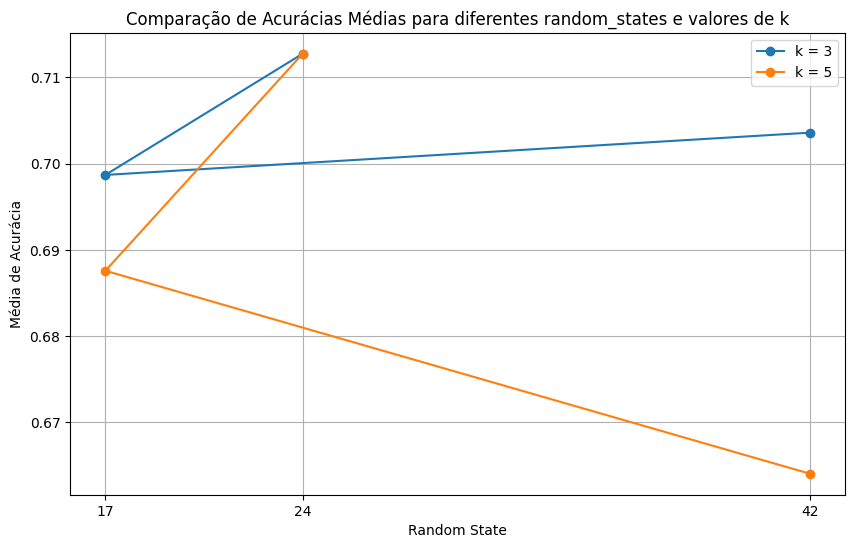

In [24]:
import matplotlib.pyplot as plt

random_states = list(resultados.keys())
comparacao = {k: [] for k in k_values}

for random_state, k_results in resultados.items():
    for k in k_values:
        comparacao[k].append(k_results[k][0])
plt.figure(figsize=(10, 6))
for k, accuracies in comparacao.items():
    plt.plot(random_states, accuracies, label=f"k = {k}", marker="o")
plt.title("Comparação de Acurácias Médias para diferentes random_states e valores de k")
plt.xlabel("Random State")
plt.ylabel("Média de Acurácia")
plt.xticks(random_states)
plt.legend()
plt.grid(True)
plt.show()